# Computation of LogDet by Stochastic Chebyshev Approximations

In [1]:
%pylab inline
import sys
sys.path.insert(0,'..')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
import spectralflow as sf


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [12]:
tf.reset_default_graph()

# Let's create a random matrix and use it to define an
# implicit operator
A = tf.orthogonal_initializer()(shape=[32,32])
A = tf.matmul(A, tf.transpose(A)) + 10/32*tf.eye(32)

def op(x):
    return tf.tensordot(x, A, axes=[[-1],[-1]])

# We use a variable scope because the chebyshev logdet estimation uses
# a power iteration to estimate the largest eigenval, and stores that
# value
with tf.variable_scope('cheby', reuse=tf.AUTO_REUSE):
    logdet = sf.chebyshev_logdet(op, shape=[128, 32], deg=50)
    
# Get true value
_, tld = tf.linalg.slogdet(A)

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
estim, true = sess.run([logdet, tld])

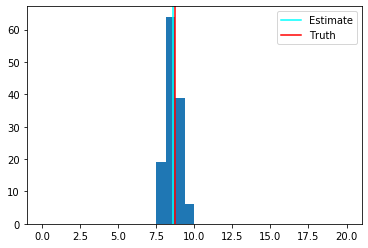

In [15]:
hist(estim,32,range=[0, 20]);
axvline(mean(estim),color='cyan', label='Estimate')
axvline(true,color='red', label='Truth')
legend();